In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt


In [2]:
end=dt.datetime.now()
start=end-dt.timedelta(days=5000)
start,end

(datetime.datetime(2008, 6, 22, 20, 55, 29, 511856),
 datetime.datetime(2022, 3, 1, 20, 55, 29, 511856))

In [3]:
df=pdr.get_data_yahoo('AAPL',start,end)
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2008-06-23,6.281429,6.127143,6.240714,6.184286,6.457808e+08,5.295443
1,2008-06-24,6.277857,6.129643,6.156071,6.187500,6.219472e+08,5.298197
2,2008-06-25,6.386786,6.210000,6.236071,6.335357,6.444508e+08,5.424803
3,2008-06-26,6.244286,6.000357,6.216786,6.009286,8.696100e+08,5.145597
4,2008-06-27,6.091786,5.862500,5.946786,6.074643,1.042250e+09,5.201560


In [4]:
df.drop(['Date','Adj Close'],axis=1)


,High,Low,Open,Close,Volume
0,6.281429,6.127143,6.240714,6.184286,6.457808e+08
1,6.277857,6.129643,6.156071,6.187500,6.219472e+08
2,6.386786,6.210000,6.236071,6.335357,6.444508e+08
3,6.244286,6.000357,6.216786,6.009286,8.696100e+08
4,6.091786,5.862500,5.946786,6.074643,1.042250e+09
...,...,...,...,...,...
3442,166.149994,159.750000,165.539993,160.070007,9.000920e+07
3443,162.850006,152.000000,152.580002,162.740005,1.411475e+08
3444,165.119995,160.869995,163.839996,164.850006,9.188170e+07
3445,165.419998,162.429993,163.059998,165.119995,9.486910e+07


In [5]:
ra100=df.Close.rolling(100).mean()
ra100
ra200=df.Close.rolling(200).mean()
ra200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3442    151.43705
3443    151.62120
3444    151.83160
3445    152.03235
3446    152.22625
Name: Close, Length: 3447, dtype: float64

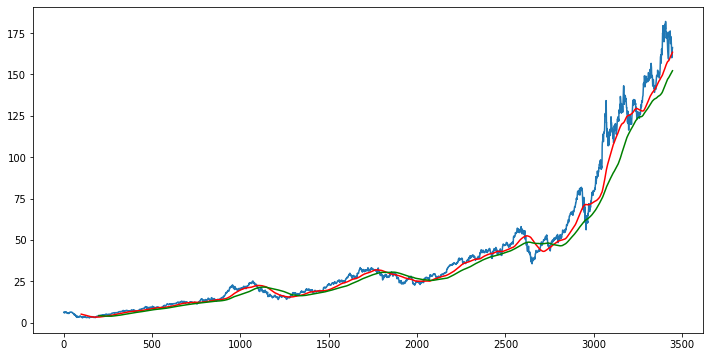

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ra100,'r')
plt.plot(ra200,'g')


In [7]:
#Data splitting


data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])
data_test.shape
data_train.shape


(2412, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_train_array=scaler.fit_transform(data_train)

In [9]:
x_train=[]
y_train=[]
for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
x_train


[array([[0.08070577],
        [0.08078225],
        [0.0843008 ],
        [0.07654129],
        [0.0780966 ],
        [0.07584438],
        [0.08199759],
        [0.07647331],
        [0.07812208],
        [0.08240553],
        [0.08613657],
        [0.08163214],
        [0.08365488],
        [0.08021281],
        [0.08131768],
        [0.07771412],
        [0.0804083 ],
        [0.0795584 ],
        [0.07389811],
        [0.07486701],
        [0.07123797],
        [0.0748415 ],
        [0.06869679],
        [0.07132295],
        [0.06476179],
        [0.0670395 ],
        [0.06941919],
        [0.0686288 ],
        [0.06668253],
        [0.0637674 ],
        [0.07006511],
        [0.07308223],
        [0.0725553 ],
        [0.07763764],
        [0.08104571],
        [0.08373988],
        [0.08592409],
        [0.0859411 ],
        [0.08289849],
        [0.08260102],
        [0.08102022],
        [0.08298347],
        [0.08166614],
        [0.08379088],
        [0.08018732],
        [0

In [10]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [11]:
#ML Model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [12]:
model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True,))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
73/73 [==============================] - 18s 190ms/step - loss: 0.0329
Epoch 2/50
73/73 [==============================] - 19s 262ms/step - loss: 0.0083
Epoch 3/50
73/73 [==============================] - 16s 226ms/step - loss: 0.0069
Epoch 4/50
73/73 [==============================] - 19s 257ms/step - loss: 0.0070
Epoch 5/50
73/73 [==============================] - 15s 202ms/step - loss: 0.0065
Epoch 6/50
73/73 [==============================] - 15s 203ms/step - loss: 0.0052
Epoch 7/50
73/73 [==============================] - 15s 208ms/step - loss: 0.0052
Epoch 8/50
73/73 [==============================] - 21s 282ms/step - loss: 0.0048
Epoch 9/50
73/73 [==============================] - 17s 228ms/step - loss: 0.0044
Epoch 10/50
73/73 [==============================] - 15s 203ms/step - loss: 0.0048
Epoch 11/50
73/73 [==============================] - 15s 203ms/step - loss: 0.0045
Epoch 12/50
73/73 [==============================] - 15s 204ms/step - loss: 0.0045
Epoch 13/50
7

In [ ]:
model.save('model.h5')


In [ ]:
past_100_days=data_train.tail(100)
final_df=past_100_days.append(data_test,ignore_index=True)
final_df.head()

,Close
0,39.375000
1,39.302502
2,39.945000
3,39.994999
4,39.817501


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(1135, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
x_test.shape,y_test.shape

((1035, 100, 1), (1035,))

In [ ]:
#prediction
y_predict=model.predict(x_test)
y_predict.shape

(1035, 1)

In [ ]:
scaler.scale_

array([0.00682769])

In [ ]:
scale_factor=1/0.00682769
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

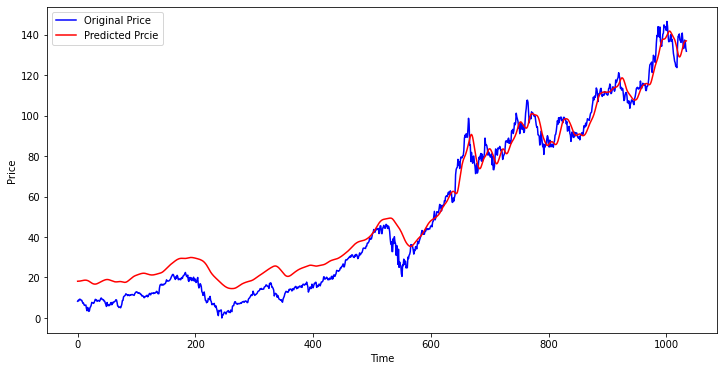

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict,'r',label='Predicted Prcie')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
